In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 


In [20]:
df = pd.read_csv("../data/heart_attack/Medicaldataset.csv")
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [21]:
df.shape

(1319, 9)

In [22]:
df.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [23]:
df.columns = [col.replace(" ","_").strip().lower() for col in df.columns]
df.columns

Index(['age', 'gender', 'heart_rate', 'systolic_blood_pressure',
       'diastolic_blood_pressure', 'blood_sugar', 'ck-mb', 'troponin',
       'result'],
      dtype='object')

In [24]:
df.dtypes

age                           int64
gender                        int64
heart_rate                    int64
systolic_blood_pressure       int64
diastolic_blood_pressure      int64
blood_sugar                 float64
ck-mb                       float64
troponin                    float64
result                       object
dtype: object

In [25]:
df["result"].unique()

array(['negative', 'positive'], dtype=object)

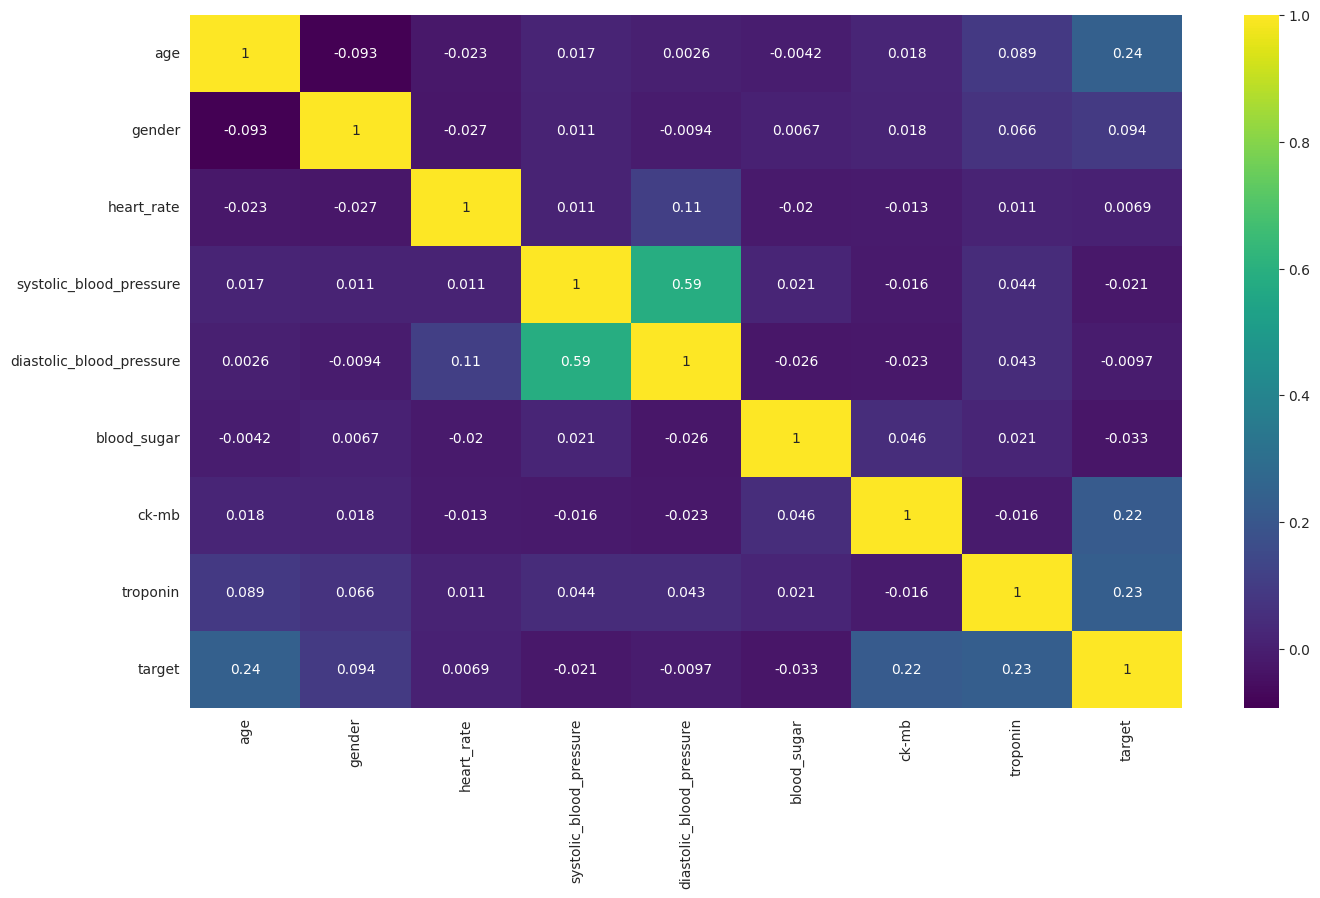

In [26]:
df["target"] = df["result"].map({'negative':0, 'positive':1})
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="viridis")
plt.show()

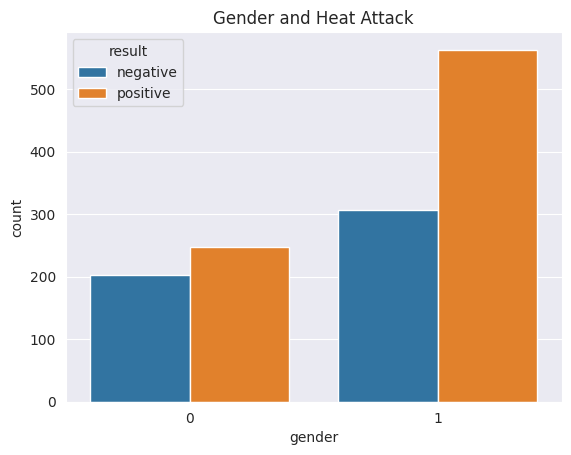

In [27]:
sns.countplot(data=df,x="gender",hue="result")
plt.title("Gender and Heat Attack")
plt.show()

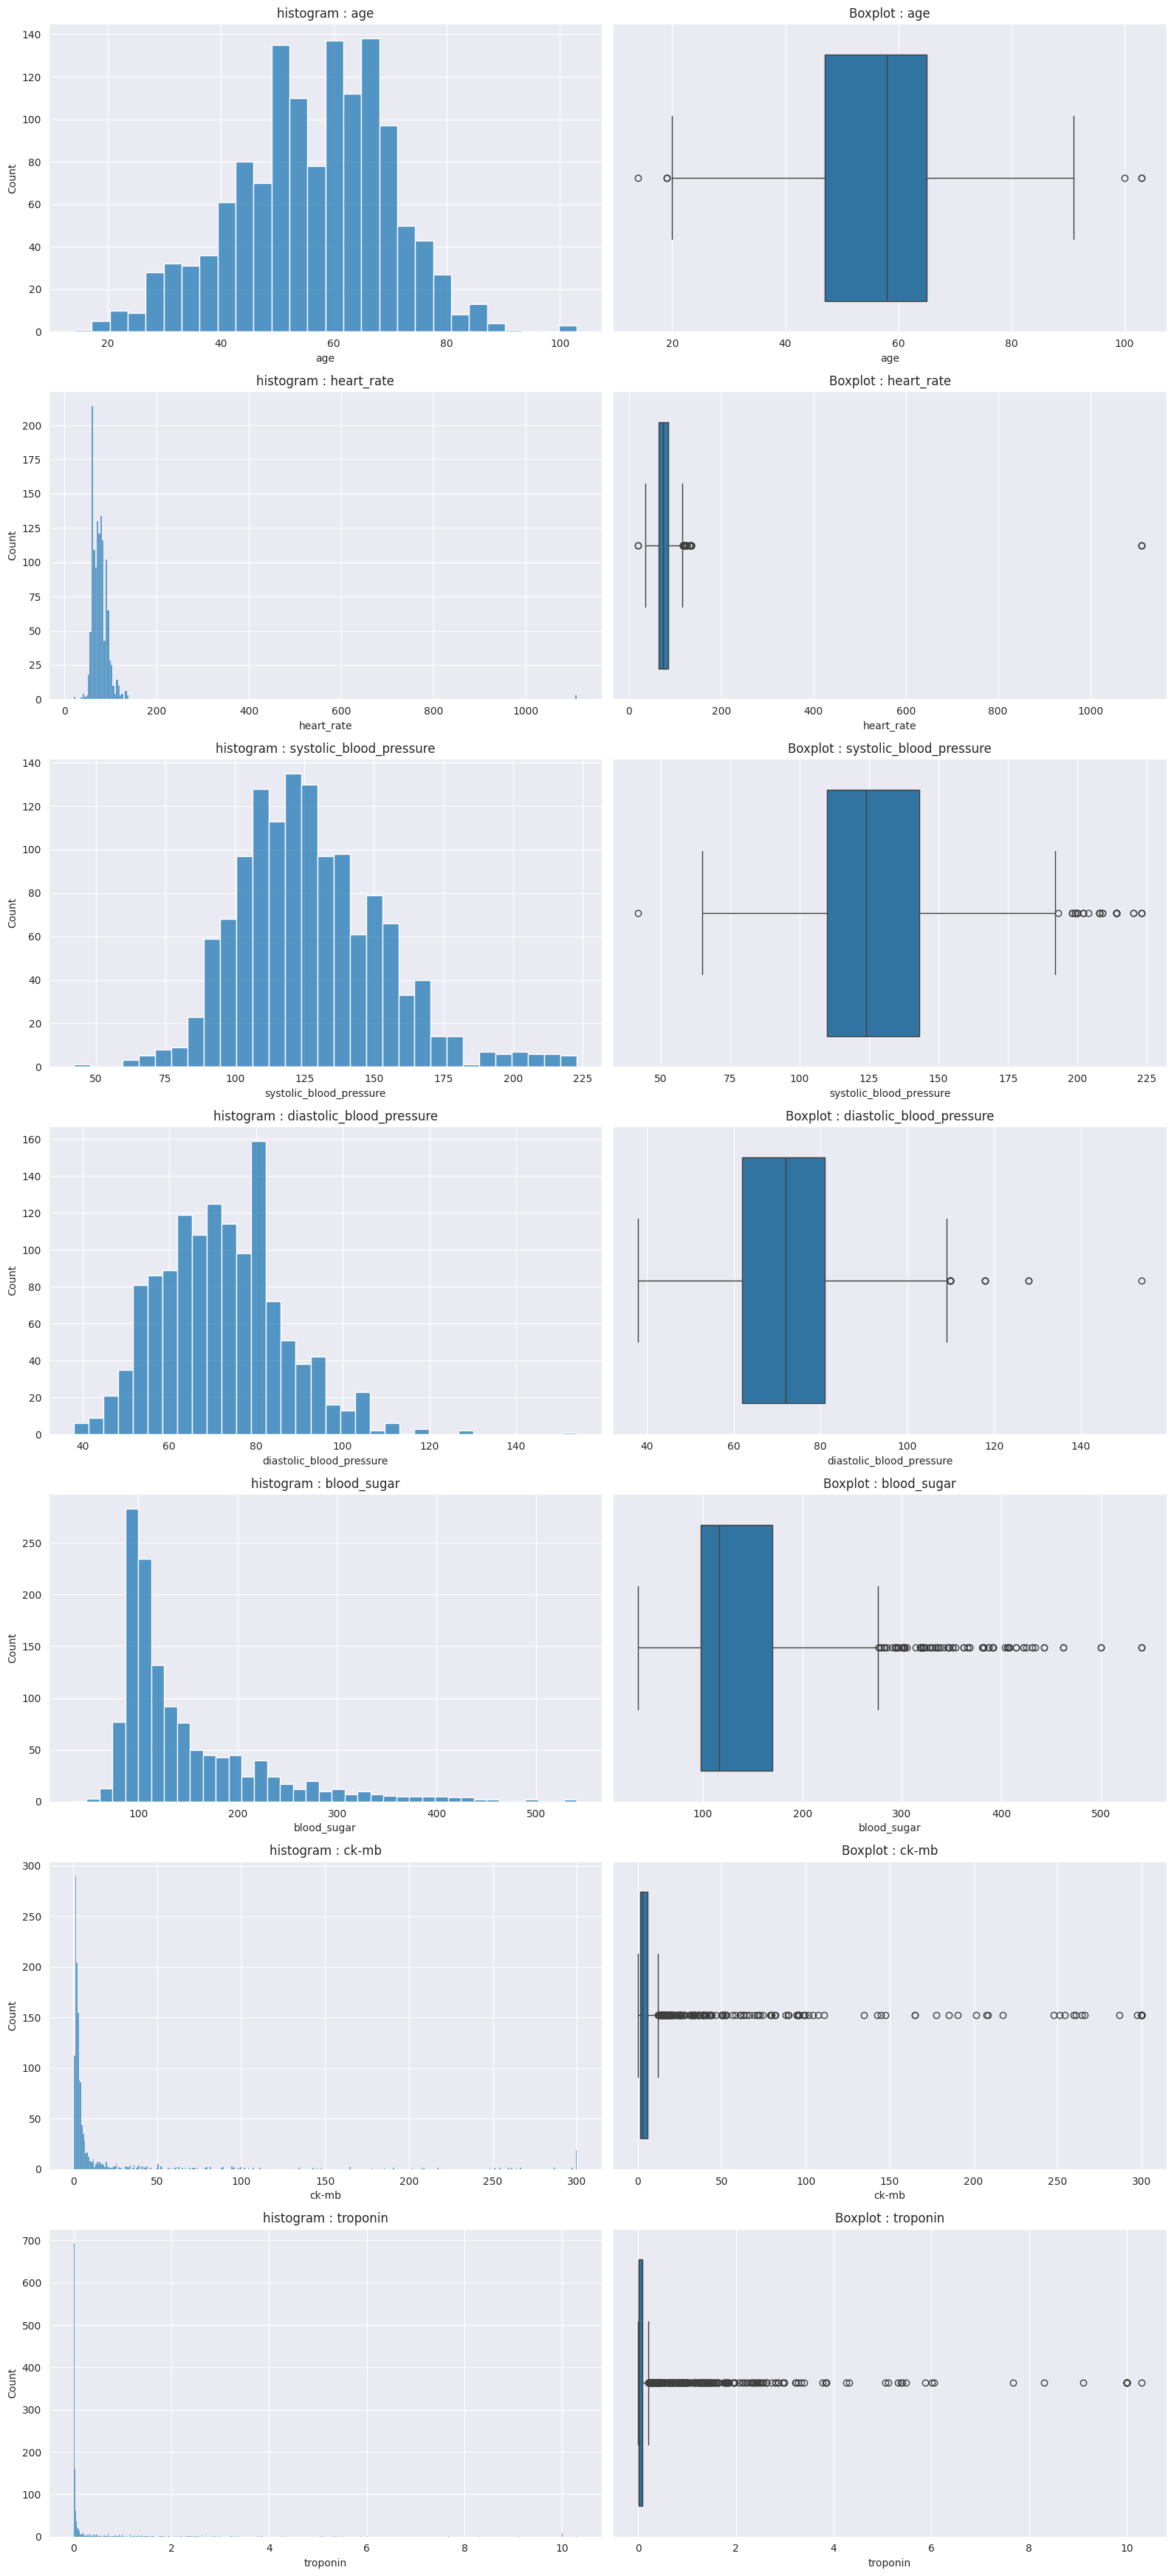

In [28]:
selected_columns = ['age','heart_rate', 'systolic_blood_pressure','diastolic_blood_pressure', 'blood_sugar', 'ck-mb', 'troponin']
plt.figure(figsize=(16,5*len(selected_columns )))
sns.set_style("darkgrid")

def plot_feature(data ,col,plot_num):
    plt.subplot(len(selected_columns),2,plot_num)
    sns.histplot(data=data,x=col)
    plt.title( f"histogram : {col}")

    plt.subplot(len(selected_columns),2,plot_num +1)
    sns.boxplot(data=data,x=col)
    plt.title( f'Boxplot : {col}')

    
for num,col in enumerate(selected_columns):
    plot_feature(df,col,2*num + 1)
plt.tight_layout()
plt.show()

In [35]:
x = df.drop(columns=["target","result"])

 
x = np.log(x+1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)
print(x_test)
sc = StandardScaler(with_mean=True)
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)
 

           age    gender  heart_rate  systolic_blood_pressure  \
677   4.343805  0.693147    4.304065                 4.744932   
1046  3.433987  0.000000    4.234107                 4.521789   
610   3.931826  0.693147    4.158883                 4.595120   
49    3.663562  0.000000    4.394449                 5.030438   
1284  3.401197  0.693147    4.406719                 5.017280   
...        ...       ...         ...                      ...   
1176  3.828641  0.693147    4.262680                 4.905275   
1002  3.931826  0.693147    4.110874                 5.017280   
1159  4.234107  0.000000    4.418841                 4.394449   
542   4.189655  0.693147    4.234107                 4.948760   
170   4.025352  0.693147    4.430817                 5.135798   

      diastolic_blood_pressure  blood_sugar     ck-mb  troponin  
677                   4.234107     4.976734  5.698770  0.023717  
1046                  4.127134     4.543295  1.595339  0.002996  
610                  

677     1
1046    0
610     0
49      0
1284    1
       ..
1176    0
1002    0
1159    1
542     1
170     1
Name: target, Length: 264, dtype: int64

In [ ]:
model =  RandomForestClassifier()
params = [
  {  
      "n_estimators": [100, 200, 300],
      "max_depth": [None, 10, 20, 30],
      "min_samples_split": [2, 5, 10],
      "min_samples_leaf": [1, 2, 4],
      "max_features": ["auto", "sqrt"],
      "criterion": ["gini", "entropy"],
  
   }
]

grid_search = GridSearchCV(model,params,cv=5,scoring="accuracy",n_jobs=-1,verbose=2)
#grid_search.fit(x_train,y_train)
#grid_search.best_params_,grid_search.best_score_

In [ ]:
model_f = RandomForestClassifier(
  criterion = 'gini',
  max_depth = None,
  max_features = 'sqrt',
  min_samples_leaf = 1,
  min_samples_split = 5,
  n_estimators = 100
      
)
model_f.fit(x_train,y_train)
model_f.predict([x_train[0]])
model_f.score(x_train,y_train),model_f.score(x_test,y_test)
#y_pred = model_f.predict(x_test)
#accuracy_score(y_test,y_pred)

(1.0, 0.9772727272727273)

In [ ]:
x_train[0]

array([-0.93664462,  0.71971217,  0.43065228,  1.02490071,  1.26767139,
       -0.72935295,  0.16518903, -0.44291146])